In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os
from sympy import factorint
import calendar
import datetime

In [3]:
calendar.month_name[1]

'January'

In [5]:
a=datetime.datetime(2020, 2, 4, 9, 24, 32)

In [3]:
os.getcwd()

'/home/sarathprabhav/git_repos/aws_data_visualisation'

In [16]:
def get_names(prefix,loc):
    os.chdir(loc)
    return [filename for filename in os.listdir('.') if filename.startswith(prefix)]
    

In [17]:
def read_tripod_data(file):
    names_tripod=['Year', 'Month', 'Date', 'Hour', 'Minute', 'Second',"RECORD","Batt_Volt_Avg",
                  "WS_ms_S_WVT","WindDir_D1_WVT","WindDir_SD1_WVT",
                  "Slr_W_Avg","Slr_MJ_Tot","Rain_mm_Tot","BP_Avg","AT_Avg","RH_Avg","TdC_Avg"]
    return pd.read_csv(file,delimiter='	',names=names_tripod,index_col=False)

In [18]:
def read_slow_r_data(file):
    return pd.read_csv(file,delimiter='	')

In [19]:
def daily_average(df):
    df_daily_avg = pd.DataFrame()
    for i in range(1,(df['Date'].max()+1)):
        day_avg = df[df['Date']==i].mean()
        day_avg = pd.DataFrame(day_avg).transpose()
        df_daily_avg = pd.concat([df_daily_avg,day_avg])
    return df_daily_avg

In [20]:
file_list = get_names('TERLS_Slow','AWS_tower_TERLS/')

In [21]:
file_list

['TERLS_Slow_response_2017_05_May.dat',
 'TERLS_Slow_response_2017_03_Mar.dat',
 'TERLS_Slow_response_2017_04_Apr.dat']

In [ ]:
da

In [22]:
data = []
for i in file_list:
    data.append(read_slow_r_data(i))

In [82]:
def day_calc(df):
    days=[]
    year = df['Year'][0]
    ts_0 = pd.Timestamp( year =df['Year'][0], month = 1, day = 1, 
                  hour = 0, minute = 0, second = 0 ).to_julian_date()
    for i in range(len(df)):
        #print(df['Date'][i])
        ts = pd.Timestamp( year =df['Year'][i], month = df['Month'][i], day = df['Date'][i], 
                          hour = df['Hour'][i], minute = df['Minute'][i], second = df['Second'][i] ).to_julian_date()
        day = ts - ts_0
        days.append(day)
    return days
        

In [86]:
f_num = 0 

In [87]:
Days = day_calc(data[f_num])

In [88]:
data[f_num]['Days'] = Days

In [113]:
data[0]['RH_32m']=data[0]['RH_32m'][data[0]['RH_32m']>0]

In [116]:
data[0]['RH_32m'].min()

60.99

In [12]:
cols = np.array(list(data_day_avg[0].columns))

In [13]:
firts_data_loc = np.where(cols=='Record')[0][0]+1

In [14]:
total_num_data = len(cols)-firts_data_loc

In [15]:
n=list(factorint(total_num_data).keys())

In [97]:
data[f_num].columns

Index(['Year', 'Month', 'Date', 'Hour', 'Minute', 'Second', 'Record', 'WS_32m',
       'WD_32m', 'WS_16m', 'WD_16m', 'WS_8m', 'WD_8m', 'WS_4m', 'WD_4m',
       'WS_2m', 'WD_2m', 'AT_32m', 'RH_32m', 'AT_16m', 'RH_16m', 'AT_8m',
       'RH_8m', 'AT_4m', 'RH_4m', 'AT_2m', 'RH_2m', 'Pressure', 'JD', 'Days'],
      dtype='object')

In [117]:
data[0]['RH_32m']=data[0]['RH_32m'][data[0]['RH_32m']>0]
data[0]['RH_16m']=data[0]['RH_16m'][data[0]['RH_16m']>0]
data[0]['RH_8m']= data[0]['RH_8m'][data[0]['RH_8m']>0]
data[0]['RH_4m']= data[0]['RH_4m'][data[0]['RH_4m']>0]

In [119]:
data[0]['AT_32m']=data[0]['AT_32m'][data[0]['AT_32m']>0]
data[0]['AT_16m']=data[0]['AT_16m'][data[0]['AT_16m']>0]
data[0]['AT_8m']= data[0]['AT_8m'][data[0]['AT_8m']>0]
data[0]['AT_4m']= data[0]['AT_4m'][data[0]['AT_4m']>0]

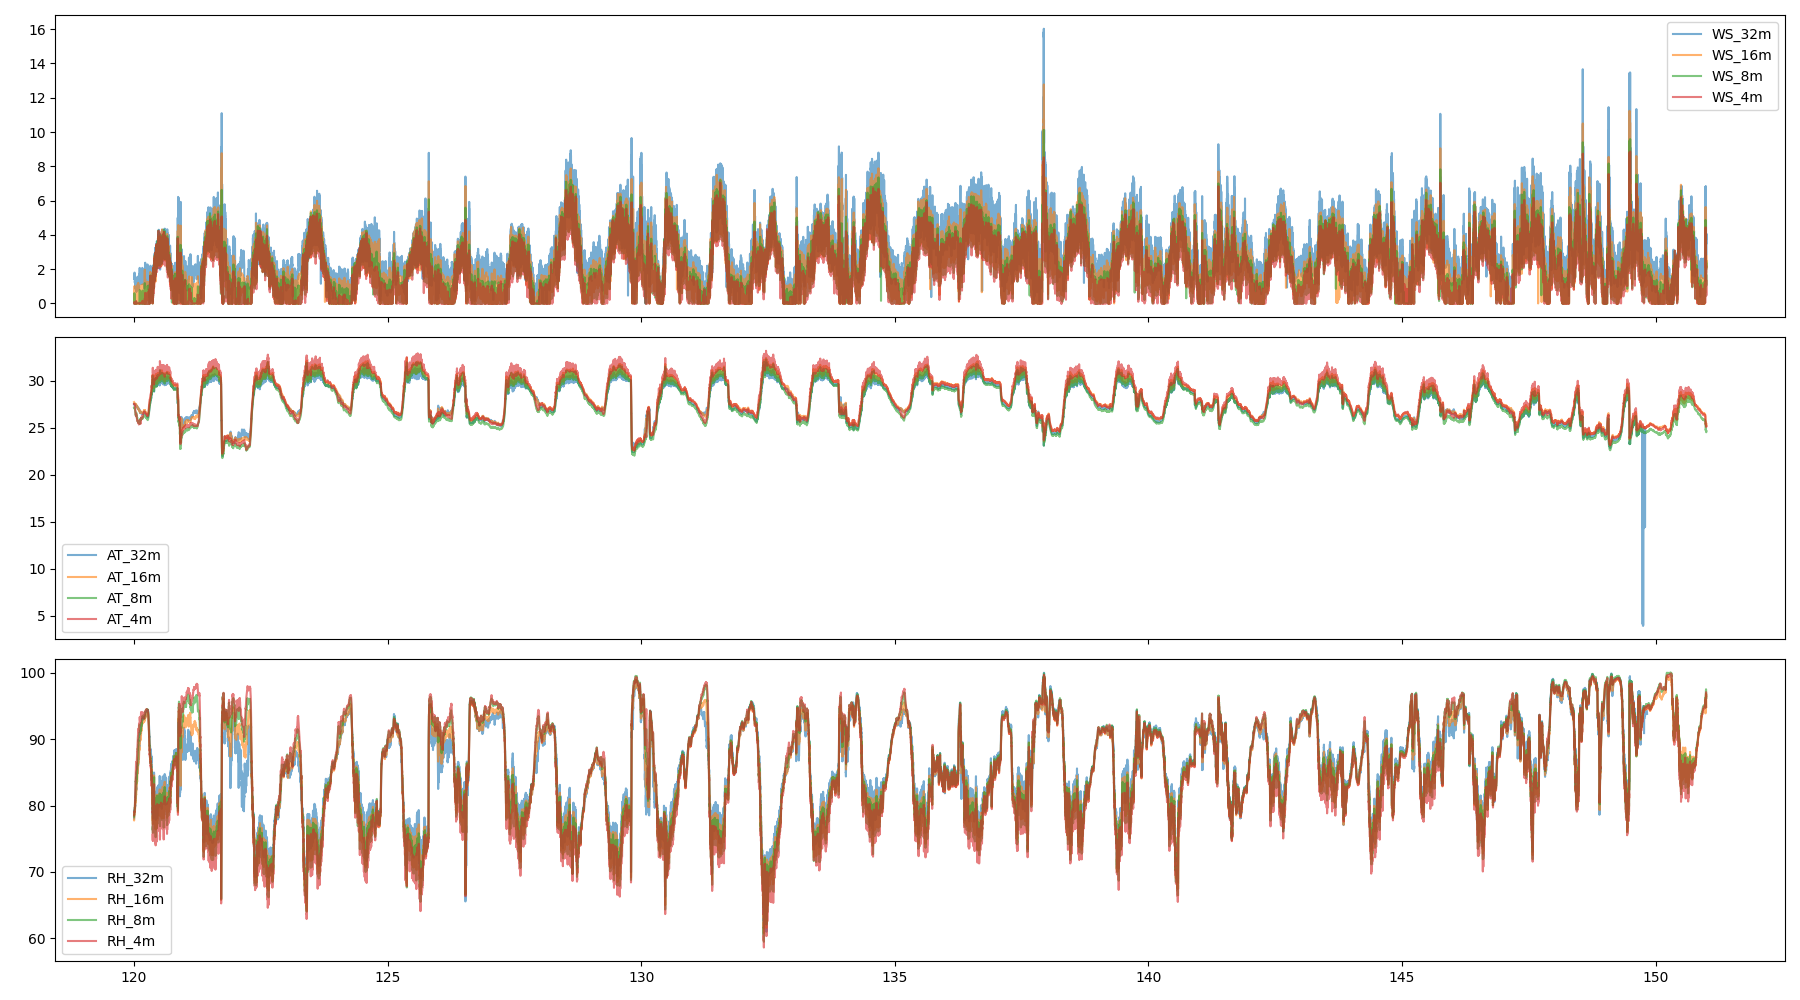

In [122]:
%matplotlib widget
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(18,10),sharex=True)
ax=axes.ravel()
x = data[f_num]['Days']
ax[0].plot(x, data[f_num]['WS_32m'],alpha=0.6, label='WS_32m' )
ax[0].plot(x, data[f_num]['WS_16m'],alpha=0.6, label='WS_16m' )
ax[0].plot(x, data[f_num]['WS_8m'], alpha=0.6, label='WS_8m' )
ax[0].plot(x, data[f_num]['WS_4m'], alpha=0.6, label='WS_4m' )
ax[0].legend()
#ax[1].plot(x, data[f_num]['WD_32m'],alpha=0.6, label='WD_32m' )
#ax[1].plot(x, data[f_num]['WD_16m'],alpha=0.6, label='WD_16m' )
#ax[1].plot(x, data[f_num]['WD_8m'],alpha=0.6,  label='WD_8m' )
#ax[1].plot(x, data[f_num]['WD_4m'],alpha=0.6,  label='WD_4m' )


ax[1].plot(x, data[f_num]['AT_32m'],alpha=0.6, label='AT_32m' )
ax[1].plot(x, data[f_num]['AT_16m'],alpha=0.6, label='AT_16m' )
ax[1].plot(x, data[f_num]['AT_8m'], alpha=0.6,  label='AT_8m' )
ax[1].plot(x, data[f_num]['AT_4m'], alpha=0.6,  label='AT_4m' )
ax[1].legend()

ax[2].plot(x, data[f_num]['RH_32m'],alpha=0.6, label='RH_32m' )
ax[2].plot(x, data[f_num]['RH_16m'],alpha=0.6, label='RH_16m' )
ax[2].plot(x, data[f_num]['RH_8m'], alpha=0.6,  label='RH_8m' )
ax[2].plot(x, data[f_num]['RH_4m'], alpha=0.6,  label='RH_4m' )
ax[2].legend()
plt.legend()
plt.tight_layout()

In [104]:
int(list(data_day_avg[0]['Month'])[0])

3

In [17]:
data[0]

,Year,Month,Date,Hour,Minute,Second,Record,WS_32m,WD_32m,WS_16m,...,RH_32m,AT_16m,RH_16m,AT_8m,RH_8m,AT_4m,RH_4m,AT_2m,RH_2m,Pressure
0,2017,5,1,0,0,0,150166,1.5000,51.6365,0.7958,...,78.050,27.7220,77.773,27.1755,78.332,27.5392,78.523,27.4863,78.894,1009.710
1,2017,5,1,0,1,0,150167,1.6375,49.8678,0.3708,...,78.316,27.7210,77.746,27.1832,78.363,27.5473,78.554,27.4976,78.953,1009.710
2,2017,5,1,0,2,0,150168,1.5875,57.5161,0.3875,...,78.340,27.7100,77.914,27.1722,78.445,27.5417,78.609,27.4891,78.949,1009.710
3,2017,5,1,0,3,0,150169,1.7000,66.1682,0.6125,...,78.512,27.6903,77.998,27.1537,78.533,27.5283,78.609,27.4900,79.006,1009.710
4,2017,5,1,0,4,0,150170,1.5375,50.9673,0.3042,...,78.506,27.6680,78.023,27.1368,78.644,27.5135,78.718,27.4733,79.060,1009.676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,2017,5,31,23,55,0,194801,4.0750,336.9702,2.8125,...,-99.999,25.1814,95.770,24.5163,96.640,25.0681,96.646,25.1621,96.750,1008.369
44636,2017,5,31,23,56,0,194802,3.7375,332.3573,2.4250,...,-99.999,25.2510,95.632,24.5474,96.626,25.0752,96.656,25.1610,96.787,1008.357
44637,2017,5,31,23,57,0,194803,3.7750,313.9059,2.3875,...,-99.999,25.3235,95.188,24.5790,96.363,25.1193,96.562,25.2097,96.775,1008.352
44638,2017,5,31,23,58,0,194804,3.8375,320.7654,2.1125,...,-99.999,25.3771,95.121,24.6097,96.375,25.1382,96.564,25.2343,96.666,1008.352


In [87]:
data_day_avg[0]

,Year,Month,Date,Hour,Minute,Second,Record,WS_32m,WD_32m,WS_16m,...,RH_32m,AT_16m,RH_16m,AT_8m,RH_8m,AT_4m,RH_4m,AT_2m,RH_2m,Pressure
0,2017.0,3.0,1.0,11.5,29.5,0.0,63045.5,3.089236,135.153311,2.332069,...,65.796751,28.455914,65.293329,28.068433,65.347942,28.528982,65.130222,28.482677,65.167344,1009.385510
0,2017.0,3.0,2.0,11.5,29.5,0.0,64485.5,2.825477,170.616935,2.070772,...,66.823947,28.325528,66.476835,27.918807,66.665131,28.396283,66.557910,28.340298,66.636959,1007.761356
0,2017.0,3.0,3.0,11.5,29.5,0.0,65925.5,2.858440,154.423545,2.238125,...,69.544588,28.708097,68.893047,28.349224,68.775381,28.922506,68.332074,28.956218,68.223365,1006.737393
0,2017.0,3.0,4.0,11.5,29.5,0.0,67365.5,2.771372,155.634179,2.165755,...,81.816044,27.666993,81.388919,27.229303,81.727845,27.740030,81.355072,27.774591,81.237956,1007.619950
0,2017.0,3.0,5.0,11.5,29.5,0.0,68805.5,3.528417,155.161420,2.866719,...,79.493281,28.118703,78.680298,27.868853,78.394710,28.461275,77.707867,28.531420,77.510611,1008.034888
0,2017.0,3.0,6.0,11.5,29.5,0.0,70245.5,2.787080,178.280707,2.200599,...,85.643160,27.744977,84.932462,27.427683,85.124674,27.970539,84.657685,27.922109,84.433028,1007.898840
0,2017.0,3.0,7.0,11.5,29.5,0.0,71685.5,2.727813,162.854744,2.122109,...,85.360377,28.097236,84.565587,27.802473,84.388589,28.402604,83.616751,28.444613,83.318197,1007.781010
0,2017.0,3.0,8.0,11.5,29.5,0.0,73125.5,2.109094,147.711071,1.569968,...,84.383631,28.267567,83.633639,27.905349,83.670381,28.505164,83.220135,28.457432,83.037994,1007.598202
0,2017.0,3.0,9.0,11.5,29.5,0.0,74565.5,2.286542,147.731529,1.746033,...,82.742694,28.555857,81.595633,28.219942,81.237285,28.845864,80.427627,28.886943,80.081934,1007.414467
0,2017.0,3.0,10.0,11.5,29.5,0.0,76005.5,2.262555,181.163575,1.751432,...,82.193425,27.860031,81.423256,27.437223,81.383190,28.013491,80.837231,28.060043,80.622741,1008.477361


In [31]:
cols

array(['Year', 'Month', 'Date', 'Hour', 'Minute', 'Second', 'Record',
       'WS_32m', 'WD_32m', 'WS_16m', 'WD_16m', 'WS_8m', 'WD_8m', 'WS_4m',
       'WD_4m', 'WS_2m', 'WD_2m', 'AT_32m', 'RH_32m', 'AT_16m', 'RH_16m',
       'AT_8m', 'RH_8m', 'AT_4m', 'RH_4m', 'AT_2m', 'RH_2m', 'Pressure'],
      dtype='<U8')

In [16]:
file_list

['TERLS_Slow_response_2017_03_Mar.dat',
 'TERLS_Slow_response_2017_04_Apr.dat',
 'TERLS_Slow_response_2017_05_May.dat']

In [ ]:
df_daily_avg = pd.DataFrame()
for i in range(1,(df['Date'].max()+1)):
    #print(i)
    day_avg = df[df['Date']==i].mean()
    day_avg = pd.DataFrame(day_avg).transpose()
    df_daily_avg = pd.concat([df_daily_avg,day_avg])

<AxesSubplot:xlabel='Date'>

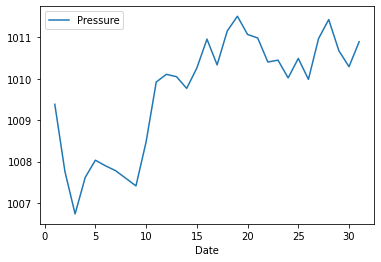

In [ ]:
df_daily_avg.plot(x ='Date',y='Pressure')

In [ ]:
df_x

,Year,Month,Date,Hour,Minute,Second,Record,WS_32m,WD_32m,WS_16m,...,RH_32m,AT_16m,RH_16m,AT_8m,RH_8m,AT_4m,RH_4m,AT_2m,RH_2m,Pressure
0,2017.0,3.0,31.0,11.5,29.5,0.0,106245.5,2.392176,155.9139,1.78912,...,87.379102,28.377782,86.582188,27.992762,86.591201,28.586184,86.111136,28.603126,85.989632,1010.897357


In [ ]:

type(df['Date'].max())

numpy.int64

In [ ]:
avg_series1=df[df['Date']==1].mean()

In [ ]:
test_df1=pd.DataFrame(avg_series1).transpose()

In [ ]:
avg_series2=df[df['Date']==2].mean()

In [ ]:
test_df2=pd.DataFrame(avg_series2).transpose()

In [ ]:
pd.concat([test_df1,test_df2])

,Year,Month,Date,Hour,Minute,Second,Record,WS_32m,WD_32m,WS_16m,...,RH_32m,AT_16m,RH_16m,AT_8m,RH_8m,AT_4m,RH_4m,AT_2m,RH_2m,Pressure
0,2017.0,3.0,1.0,11.5,29.5,0.0,63045.5,3.089236,135.153311,2.332069,...,65.796751,28.455914,65.293329,28.068433,65.347942,28.528982,65.130222,28.482677,65.167344,1009.385510
0,2017.0,3.0,2.0,11.5,29.5,0.0,64485.5,2.825477,170.616935,2.070772,...,66.823947,28.325528,66.476835,27.918807,66.665131,28.396283,66.557910,28.340298,66.636959,1007.761356


In [ ]:
dff=pd.DataFrame()

In [ ]:
pd.concat([dff,test_df2])

,Year,Month,Date,Hour,Minute,Second,Record,WS_32m,WD_32m,WS_16m,...,RH_32m,AT_16m,RH_16m,AT_8m,RH_8m,AT_4m,RH_4m,AT_2m,RH_2m,Pressure
0,2017.0,3.0,2.0,11.5,29.5,0.0,64485.5,2.825477,170.616935,2.070772,...,66.823947,28.325528,66.476835,27.918807,66.665131,28.396283,66.55791,28.340298,66.636959,1007.761356
